In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import files

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import load_img

In [2]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.98):
      print("\nAkurasi di atas 98%, hentikan training!")
      self.model.stop_training = True

callbacks = myCallback()

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(X_train, y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
print("x Train:",X_train.shape)
print("y Train:",y_train.shape)
print("x Test:",X_test.shape)
print("y Test:",y_test.shape)

x Train: (60000, 28, 28)
y Train: (60000,)
x Test: (10000, 28, 28)
y Test: (10000,)


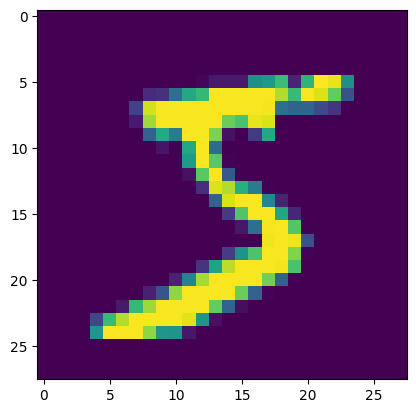

5


In [6]:
plt.imshow(X_train[0])
plt.show()
print("===============")
print(y_train[0])
print("===============")

In [7]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [8]:
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (28,28,1)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(128, activation= 'relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation= 'softmax')
])

In [10]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
history = model.fit(X_train, y_train, batch_size=32, epochs=15, validation_split=0.3, callbacks = [callbacks])

Epoch 1/15
1313/1313 [==============================] - 25s 8ms/step - loss: 0.3084 - accuracy: 0.9023 - val_loss: 0.0761 - val_accuracy: 0.9764
Epoch 2/15
1313/1313 [==============================] - 6s 5ms/step - loss: 0.1230 - accuracy: 0.9626 - val_loss: 0.0526 - val_accuracy: 0.9837
Epoch 3/15
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0971 - accuracy: 0.9712 - val_loss: 0.0500 - val_accuracy: 0.9838
Epoch 4/15
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0849 - accuracy: 0.9743 - val_loss: 0.0426 - val_accuracy: 0.9867
Epoch 5/15
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0734 - accuracy: 0.9774 - val_loss: 0.0376 - val_accuracy: 0.9881
Epoch 6/15
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0648 - accuracy: 0.9798 - val_loss: 0.0427 - val_accuracy: 0.9874
Epoch 7/15
1309/1313 [============================>.] - ETA: 0s - loss: 0.0646 - accuracy: 0.9804
Akurasi di atas 98%, hentikan trainin

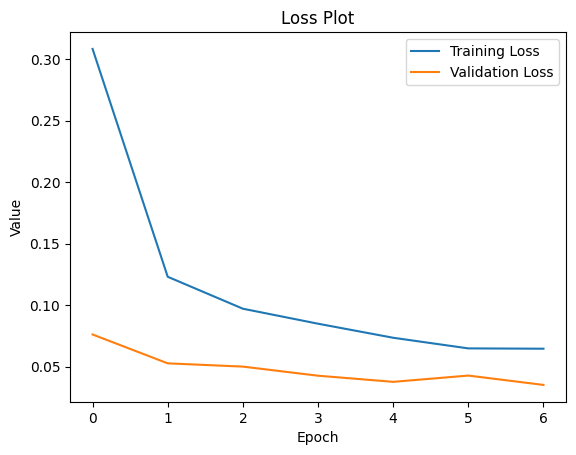

In [12]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

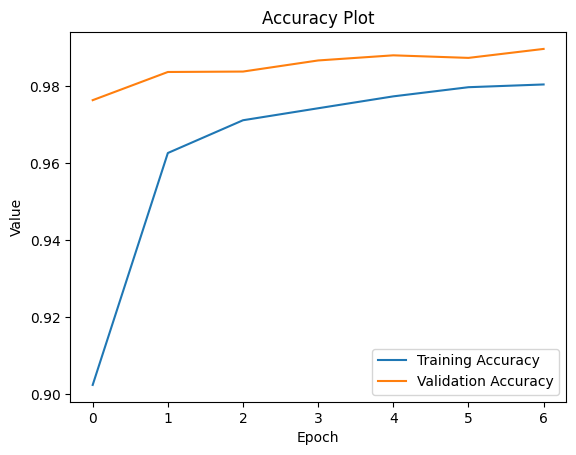

In [13]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

In [14]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test score:', score[1])

Test loss: 0.027696900069713593
Test score: 0.9907000064849854


Saving numbe.png to numbe.png
1/1 [==============================] - 0s 375ms/step
Predicted class: 5


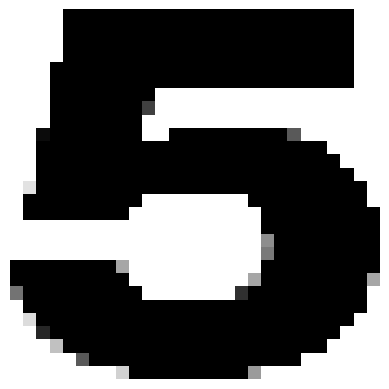

In [15]:
%matplotlib inline
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = load_img(path, target_size=(28, 28), color_mode="grayscale")
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array, batch_size=10)
    predicted_class = np.argmax(prediction)
    print("Predicted class:", predicted_class)

    # Plot the image
    plt.imshow(img, cmap="gray")
    plt.axis('off')
    plt.show()